In [4]:
#-- Packages needs to be installed before Data Processing
#install.packages ("pheatmap")
#install.packages ("NMF")
#install.packages("pgirmess") #-- There is a problem in the installation of This packages
#install.packages ("ggrepel")
#install.packages ("RColorBrewer")

#install.packages('BiocManager')
#library (BiocManager)
#BiocManager::install('DESeq2')
#BiocManager::install('EnhancedVolcano')
#BiocManager::install("variancePartition")


In [6]:
library (pheatmap)
library (ggplot2)
library (NMF)
library (variancePartition)
library (EnhancedVolcano)
library (ggrepel)
library (RColorBrewer)
library (DESeq2)
#library (pgirmess)

In [11]:
#packageVersion("Rcpp")
list.files () #Look what files are there in the Main directory

[1] "GSE81266-expression.txt.txt"   "GSE81266-genelength.txt.txt"  
[3] "GSE81266-metadata.txt.txt"     "IntroductionToR.ipynb"        
[5] "pgirmess_1.7.0.tar.gz"         "RNA_Sew_data_processing.ipynb"

In [5]:
#--- Load All three files: 1. Count Data, 2. Metadata and 3. Length of genes
Gene_counts <- read.csv(file = "GSE81266-expression.txt.txt", sep = "\t", row.names = 1, header = T)
metadata <- read.csv(file = "GSE81266-metadata.txt.txt", sep = "\t", row.names = 1, header = T)
Gene_length <- read.csv(file = "GSE81266-genelength.txt.txt", sep = "\t", header = T)

In [12]:
ls () #Look what files are Loaded in R

[1] "Gene_counts" "Gene_length" "metadata"

In [19]:
head(Gene_counts)
head (metadata)
head (Gene_length)
# Sort by vector name [z]
#dataframe[with(dataframe, order(z)),]

,GSM2147897,GSM2147875,GSM2147947,GSM2147934,GSM2147876,GSM2147901,GSM2147903,GSM2147879,GSM2147888,GSM2147918,...,GSM2147939,GSM2147887,GSM2147880,GSM2147931,GSM2147928,GSM2147943,GSM2147912,GSM2147882,GSM2147948,GSM2147872
A1BG,112,64,132,104,97,72,69,85,81,2,...,139,48,60,122,115,51,78,42,118,108
A1CF,3241,3729,5995,6228,2107,5070,5012,3027,4104,835,...,3302,1721,2577,14818,8228,5218,2121,1531,2889,2146
A2M,4080,8536,15965,1152,11578,6488,7283,10312,5372,351,...,18035,2068,6215,14543,14475,5704,13303,4040,9973,11093
A2ML1,15,10,30,23,19,19,7,17,20,7,...,27,3,9,22,27,13,8,5,22,12
A2MP1,7,10,34,6,16,13,6,12,16,0,...,63,8,8,37,15,25,21,8,31,12
A3GALT2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,Sample.Title,Sex,age,diagnosis,ethnicity,patient,prognosis,tissue
GSM2147897,NH1,male,30,Ulcerative colitis,Caucasian,P427,Healthy,Prepouch ileum
GSM2147875,EC4,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Prepouch ileum
GSM2147947,NH64,missing,missing,Normal,Caucasian,IL1,Healthy,Ile
GSM2147934,NH60,male,missing,Ulcerative colitis,Caucasian,P607,Healthy,Prepouch ileum
GSM2147876,EC5,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Ileal pouch
GSM2147901,NH23,male,47,Ulcerative colitis,South Indian,P505,Healthy,Ileal pouch


gene_symbol,gene_length
A1BG,507
A1CF,7190
A2M,13558
A2ML1,1025
A2MP1,1282
A3GALT2,4521


In [22]:
#Check the sturcture of Data: Obervations will be in the Row and Variables will be in the columns
str (Gene_counts)
str (metadata)

'data.frame':	35238 obs. of  77 variables:
 $ GSM2147897: int  112 3241 4080 15 7 0 33 0 246 437 ...
 $ GSM2147875: int  64 3729 8536 10 10 0 24 1 267 396 ...
 $ GSM2147947: int  132 5995 15965 30 34 0 127 1 552 706 ...
 $ GSM2147934: int  104 6228 1152 23 6 1 16 1 377 680 ...
 $ GSM2147876: int  97 2107 11578 19 16 0 79 0 382 589 ...
 $ GSM2147901: int  72 5070 6488 19 13 0 26 0 207 504 ...
 $ GSM2147903: int  69 5012 7283 7 6 0 29 0 300 463 ...
 $ GSM2147879: int  85 3027 10312 17 12 0 60 0 369 454 ...
 $ GSM2147888: int  81 4104 5372 20 16 0 33 0 361 570 ...
 $ GSM2147918: int  2 835 351 7 0 0 7 0 77 129 ...
 $ GSM2147927: int  50 8412 6172 12 4 0 29 0 267 456 ...
 $ GSM2147917: int  54 5531 15433 9 17 0 49 0 565 589 ...
 $ GSM2147944: int  44 1342 3533 7 6 0 30 0 176 226 ...
 $ GSM2147886: int  67 4029 5614 17 4 0 55 0 279 462 ...
 $ GSM2147940: int  70 6438 4344 19 7 0 28 55 448 809 ...
 $ GSM2147885: int  75 3446 10005 15 15 0 28 1 297 440 ...
 $ GSM2147941: int  98 6585 1389 30 

In [25]:
#-- Make sure Samples names are in the same order
colnames(Gene_counts)
row.names(metadata)

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

In [ ]:
#--- Counts number of reads mapped to Genes in Each sample
colSums (Gene_counts)

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

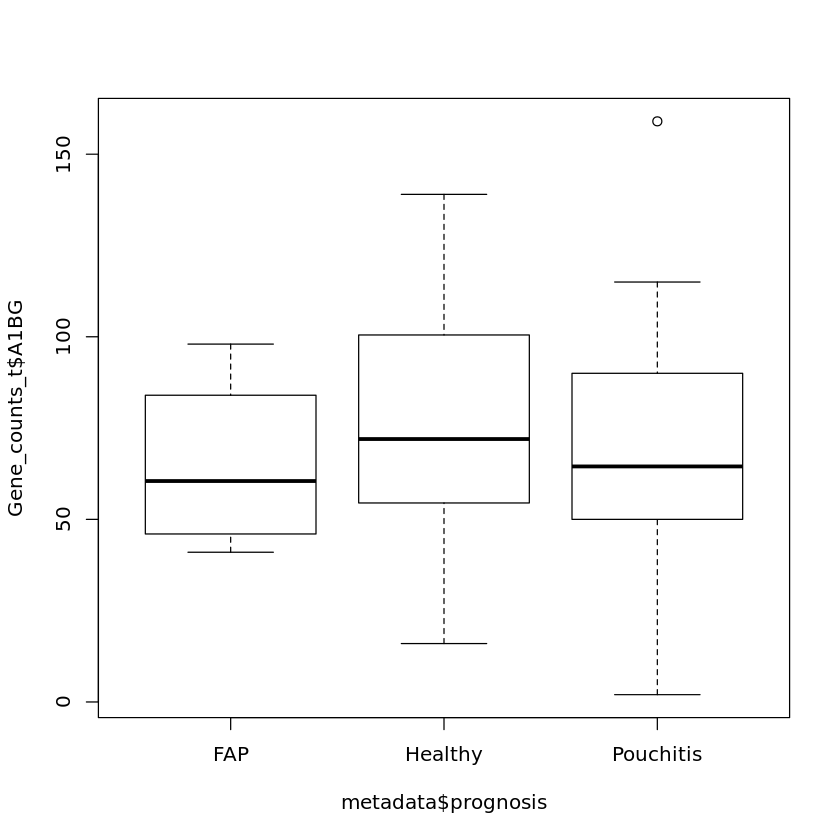

In [28]:
#---- Check the differences in the expression of any one Genes among Healthy and Pouchitis
Gene_counts_t <- data.frame(t(Gene_counts))
row.names (Gene_counts_t)
boxplot (Gene_counts_t$A1BG ~ metadata$prognosis)

In [29]:
#- These are Raw counts which shows expression seems little Higher in Helahty in comparision to FAP and Pouchitis
#-- Now we will try to Normalize this data (TPM Counts): Why this is important?

#Divide the read counts by the length of each gene in kilobases. This gives you reads per kilobase (RPK).
#Count up all the RPK values in a sample and divide this number by 1,000,000. This is your “per million” scaling factor.
#Divide the RPK values by the “per million” scaling factor. This gives you TPM.

r_tpm <- function(dfr,len)
{
  dfr1 <- sweep(dfr,MARGIN=1,(len/10^4),`/`)
  scf <- colSums(dfr1)/(10^6)
  return(sweep(dfr1,2,scf,`/`))
}

In [30]:
Gene_counts_TPM <- r_tpm(Gene_counts, Gene_length$gene_length)

In [31]:
colSums(Gene_counts) # Check counts of reads mapped to genes in each sample
colSums(Gene_counts_TPM) # Check normalized counts of reads mapped to genes in each sample

GSM2147897 GSM2147875 GSM2147947 GSM2147934 GSM2147876 GSM2147901 GSM2147903 
  29277366   18104563   28917430   29608045   18661968   25326244   26420455 
GSM2147879 GSM2147888 GSM2147918 GSM2147927 GSM2147917 GSM2147944 GSM2147886 
  18310419   25580682    5663033   26042958   34306960   11970685   18751649 
GSM2147940 GSM2147885 GSM2147941 GSM2147915 GSM2147893 GSM2147930 GSM2147899 
  33145157   21640357   25036523   26034962   23840244   27429905   20545314 
GSM2147919 GSM2147889 GSM2147873 GSM2147920 GSM2147922 GSM2147925 GSM2147932 
  24580230   26366956   18272321   30424177   27298302   29300057   29580617 
GSM2147914 GSM2147904 GSM2147891 GSM2147916 GSM2147929 GSM2147937 GSM2147881 
  26474276   22300939   24838551   23047953   25111495   26070435   18540124 
GSM2147938 GSM2147892 GSM2147898 GSM2147883 GSM2147945 GSM2147942 GSM2147884 
  21330938   28309846   24639479   19623177   10706443   23128529    6957369 
GSM2147902 GSM2147923 GSM2147906 GSM2147911 GSM2147900 GSM2147921 GSM2147895 
  23629469   31930987   21276527   23632370   23522658   31453160   26393192 
GSM2147910 GSM2147905 GSM2147913 GSM2147936 GSM2147874 GSM2147909 GSM2147924 
  23653931   26909417   23977211   24924961   21271293   31822108   27969215 
GSM2147946 GSM2147933 GSM2147890 GSM2147877 GSM2147894 GSM2147907 GSM2147896 
  19436642   21648685   25448420   17757195   22283555   23671736   22501380 
GSM2147878 GSM2147908 GSM2147935 GSM2147926 GSM2147939 GSM2147887 GSM2147880 
   6040786   29006976   22933450   25753971   32020559    9798985   15195540 
GSM2147931 GSM2147928 GSM2147943 GSM2147912 GSM2147882 GSM2147948 GSM2147872 
  54911915   33868986   22421383   25266628   10248472   20578452   17388714

GSM2147897 GSM2147875 GSM2147947 GSM2147934 GSM2147876 GSM2147901 GSM2147903 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147879 GSM2147888 GSM2147918 GSM2147927 GSM2147917 GSM2147944 GSM2147886 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147940 GSM2147885 GSM2147941 GSM2147915 GSM2147893 GSM2147930 GSM2147899 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147919 GSM2147889 GSM2147873 GSM2147920 GSM2147922 GSM2147925 GSM2147932 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147914 GSM2147904 GSM2147891 GSM2147916 GSM2147929 GSM2147937 GSM2147881 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147938 GSM2147892 GSM2147898 GSM2147883 GSM2147945 GSM2147942 GSM2147884 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147902 GSM2147923 GSM2147906 GSM2147911 GSM2147900 GSM2147921 GSM2147895 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147910 GSM2147905 GSM2147913 GSM2147936 GSM2147874 GSM2147909 GSM2147924 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147946 GSM2147933 GSM2147890 GSM2147877 GSM2147894 GSM2147907 GSM2147896 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147878 GSM2147908 GSM2147935 GSM2147926 GSM2147939 GSM2147887 GSM2147880 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06 
GSM2147931 GSM2147928 GSM2147943 GSM2147912 GSM2147882 GSM2147948 GSM2147872 
     1e+06      1e+06      1e+06      1e+06      1e+06      1e+06      1e+06

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

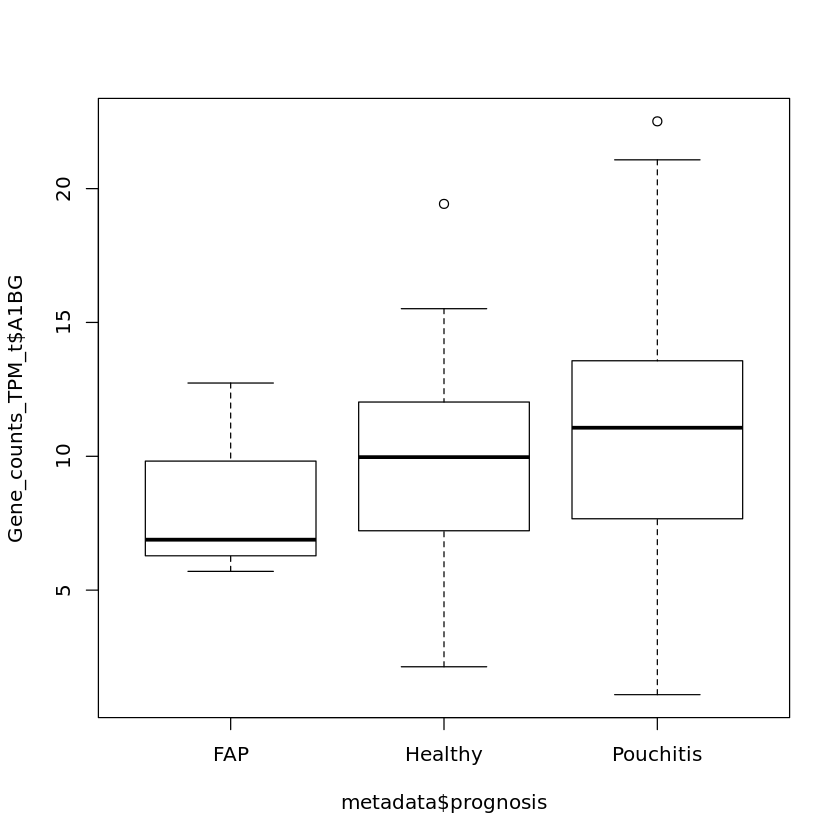

In [33]:
#---- Check the differences in the expression of any one Genes among Healthy and Pouchitis
Gene_counts_TPM_t <- data.frame(t(Gene_counts_TPM))
row.names (Gene_counts_TPM_t)
boxplot (Gene_counts_TPM_t$A1BG ~ metadata$prognosis)

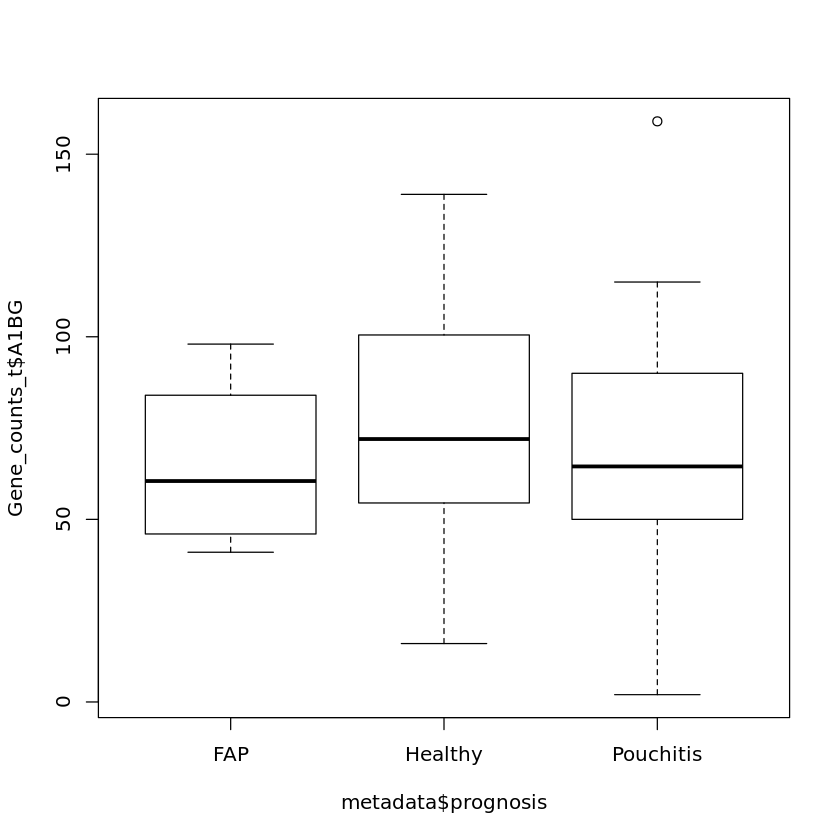

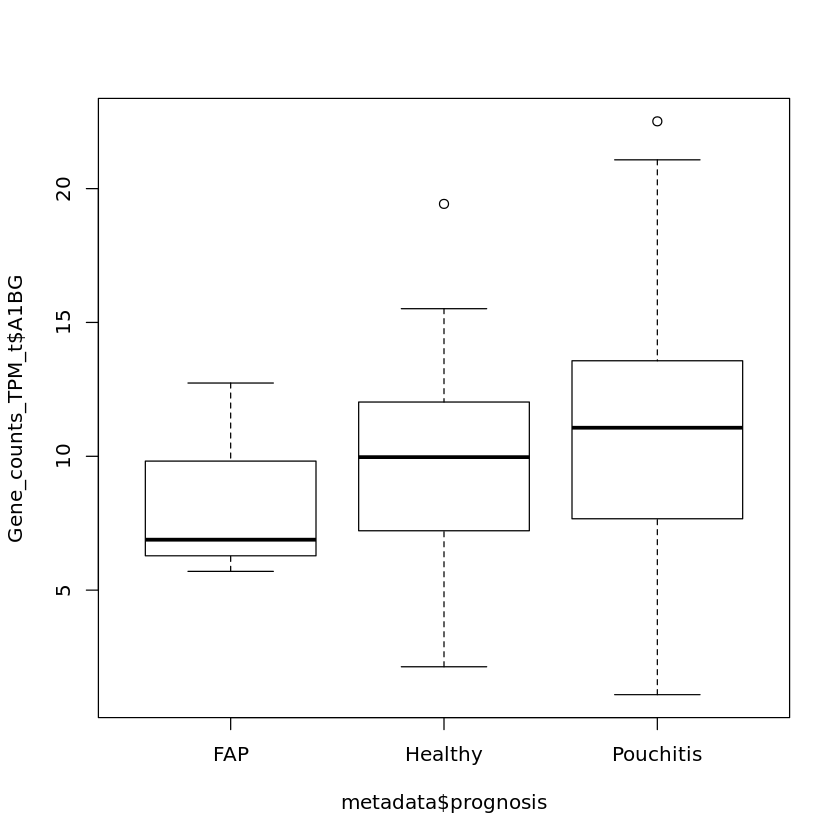

In [34]:
#--- See the Effect of Normalization and Why it is Important;
boxplot (Gene_counts_t$A1BG ~ metadata$prognosis)
boxplot (Gene_counts_TPM_t$A1BG ~ metadata$prognosis)

ERROR: Error in boxplot(Gene_counts_t$A1BG ~ metadata$prognosis, col = Color, : non-numeric argument to binary operator


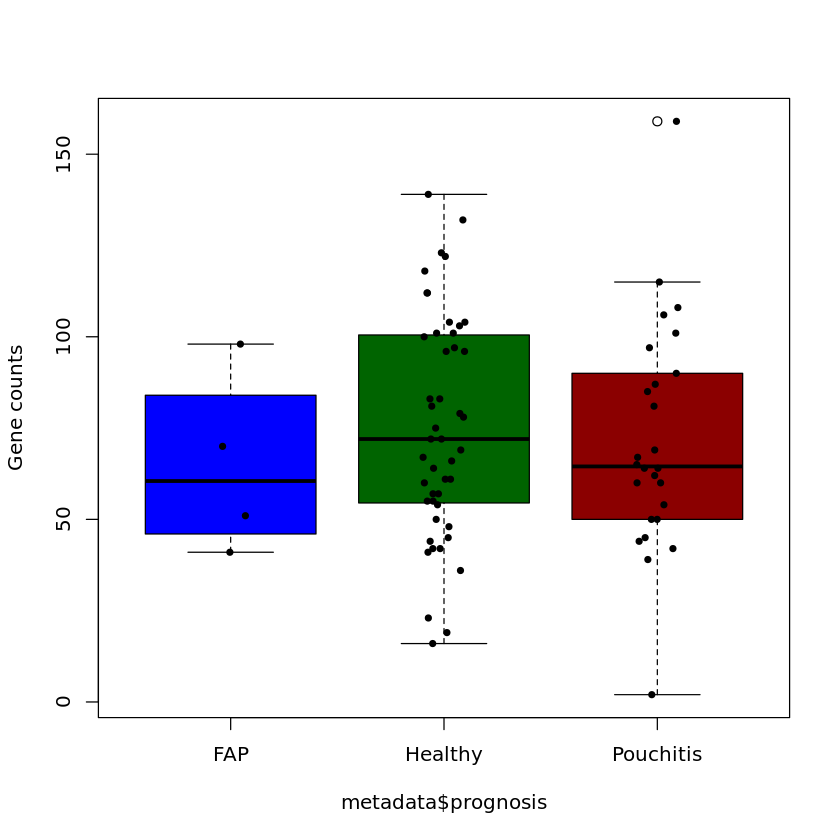

In [50]:
#--To make these colors little more beautifiul with colours and expression of this gene in Each sample:
Color <- c("blue", "darkgreen", "darkred")
boxplot (Gene_counts_t$A1BG ~ metadata$prognosis, col=Color, ylab="Gene counts") +
stripchart(Gene_counts_t$A1BG ~ metadata$prognosis, vertical = TRUE, method = "jitter", add = TRUE, pch = 20, col = 'black')

boxplot (Gene_counts_TPM_t$A1BG ~ metadata$prognosis, col=Color, ylab="Gene counts normalized  (TPM)") +
stripchart(Gene_counts_TPM_t$A1BG ~ metadata$prognosis, vertical = TRUE, method = "jitter", add = TRUE, pch = 20, col = 'black')

ERROR: Error in boxplot(Gene_counts_TPM_t$A1BG ~ metadata$prognosis, col = Color, : non-numeric argument to binary operator


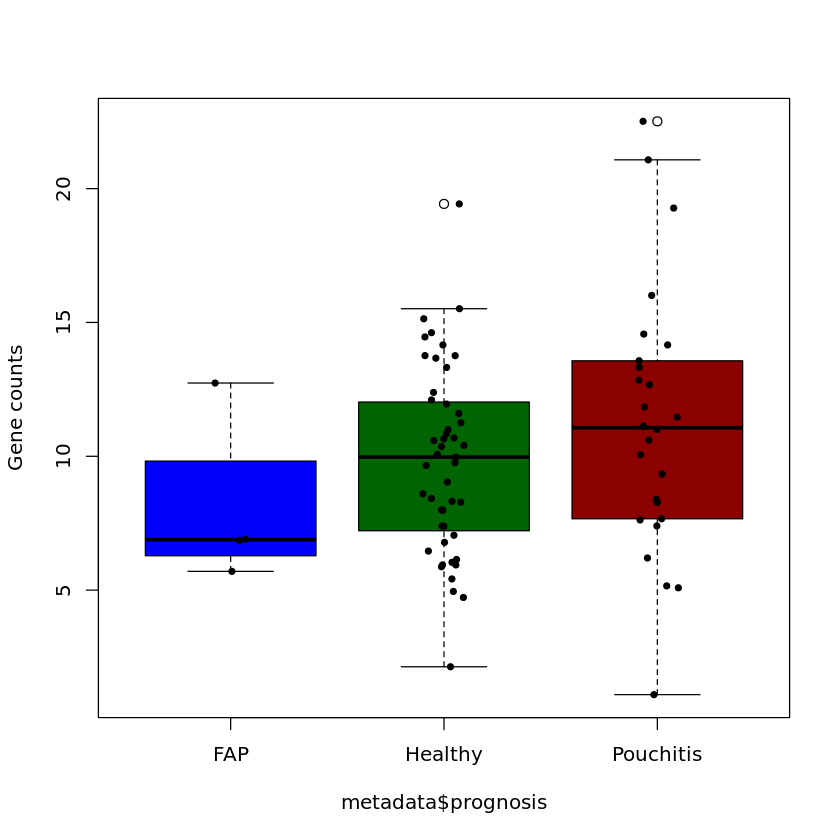

In [35]:
#---- Save the Normalized TPM Counts If you would like to use them in Future
write.table(Gene_counts_TPM, file="Gene_counts_TPM.txt", sep = "\t")

In [36]:
list.files () #Look what files are there in the Main directory

[1] "Gene_counts_TPM.txt"           "GSE81266-expression.txt.txt"  
[3] "GSE81266-genelength.txt.txt"   "GSE81266-metadata.txt.txt"    
[5] "IntroductionToR.ipynb"         "pgirmess_1.7.0.tar.gz"        
[7] "RNA_Sew_data_processing.ipynb"

In [51]:
# Don't forget to Check the row.names should be in the same Order
row.names (metadata)
row.names (Gene_counts_t)
row.names (Gene_counts_TPM_t)

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] 35238    77

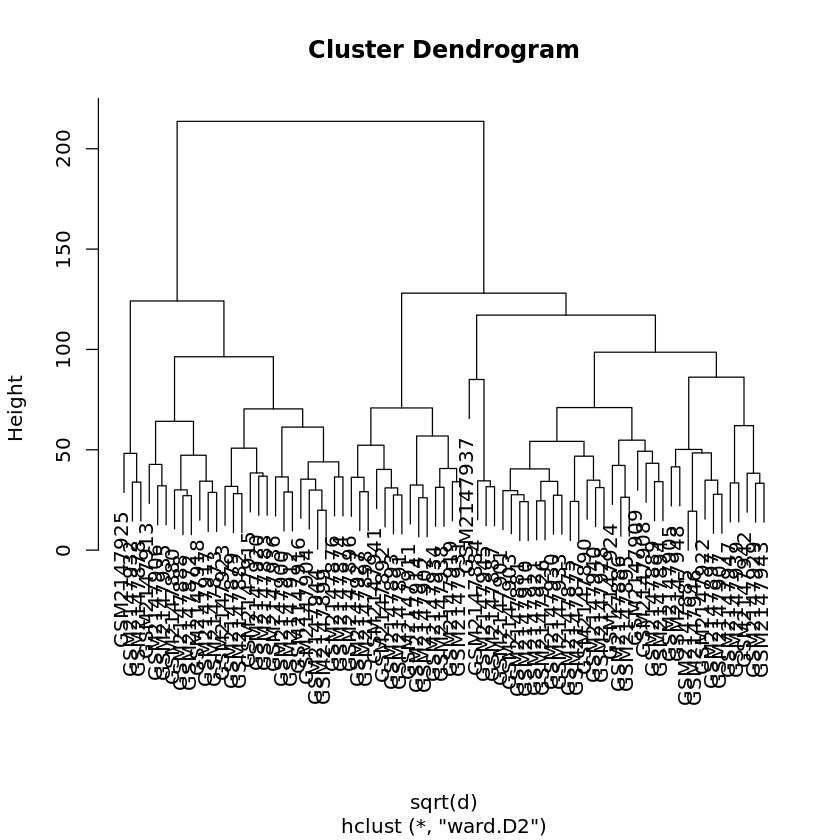

In [54]:
#----- Data Analysis ----
#- Now you know the data structure. And how to play with one gene at a time. Let's start doing little bit more complicated analysis

################
##-- Clustering
################
dim(Gene_counts_TPM)
rn<-nrow(Gene_counts_TPM)
m<-unique(sample(rn, 1000))
rand_data<-Gene_counts_TPM[m,]
d <- dist(t(rand_data), method = "euclidean")
#for(i in 1:9999){
#  m<-unique(sample(rn, 1000))
#  rand_data<-Gene_counts_TPM[m,]
#  d <-d+ dist(t(rand_data), method = "euclidean")	
  
#}
#d1<-d/100000
fit <- hclust(sqrt(d), method="ward.D2") 
plot(fit)


In [58]:
######################################
#---- DESeq - Differential Expression
######################################
# For this analysis we will not use TPM we will use only Counts; Because DESeq will do its own normalization
library (DESeq2)
dim(Gene_counts)
Gene_counts1<-round(Gene_counts)

Gene_counts_Factor <- DESeqDataSetFromMatrix(Gene_counts1, colData=metadata,design= ~prognosis)
Gene_counts_Factor <- DESeq(Gene_counts_Factor)

Gene_counts_Factor_vsd <- varianceStabilizingTransformation(Gene_counts_Factor,blind=FALSE)
#write.csv(assay(Gene_counts_Factor_vsd),file="Outputs/Gene_counts_Factor_vsd_DESEq2.csv")

#--- Different Way to Save VSDs
Gene_counts_Factor_vsd_df <- data.frame(assay(Gene_counts_Factor_vsd))
#write.table(Gene_counts_Factor_vsd_df, file="Outputs/Gene_counts_Factor_vsd_DESEq2.txt", sep = "\t")


[1] 35238    77

converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 107 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,GSM2147897,GSM2147875,GSM2147947,GSM2147934,GSM2147876,GSM2147901,GSM2147903,GSM2147879,GSM2147888,GSM2147918,...,GSM2147939,GSM2147887,GSM2147880,GSM2147931,GSM2147928,GSM2147943,GSM2147912,GSM2147882,GSM2147948,GSM2147872
A1BG,6.765230,6.408714,6.580678,6.512006,6.718004,6.355316,6.260788,6.678366,6.459297,4.448873,...,6.697771,6.823636,6.590397,6.187940,6.345684,6.067896,6.395817,6.591263,6.833851,7.027001
A1CF,11.378544,11.953894,11.805673,12.119756,10.912523,12.159844,12.085952,11.573498,11.815402,11.612891,...,11.016613,11.754291,11.737214,12.732471,12.170749,12.330372,10.846103,11.502971,11.219335,11.143007
A2M,11.708656,13.144949,13.214186,9.710664,13.359520,12.514383,12.623222,13.335790,12.202118,10.374015,...,13.455664,12.018011,13.002787,12.705518,12.983249,12.458416,13.483064,12.897249,12.998988,13.503586
A2ML1,4.775225,4.673245,5.066900,4.997430,5.038468,5.031907,4.329225,5.028747,5.050626,5.402961,...,5.018052,4.324144,4.752575,4.639523,4.931900,4.807159,4.401151,4.594728,5.075933,4.793169
A2MP1,4.298512,4.673245,5.172690,4.153267,4.901941,4.742087,4.247931,4.761628,4.874015,3.182172,...,5.803745,4.977887,4.670119,5.025545,4.519373,5.347582,5.077213,4.931927,5.377153,4.793169
A3GALT2,3.182172,3.182172,3.182172,3.584838,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,...,3.182172,3.182172,3.182172,3.182172,3.182172,3.654949,3.182172,3.182172,3.182172,3.182172


ERROR: Error in boxplot(Gene_counts_Factor_vsd_df_t$A1BG ~ metadata$prognosis, : non-numeric argument to binary operator


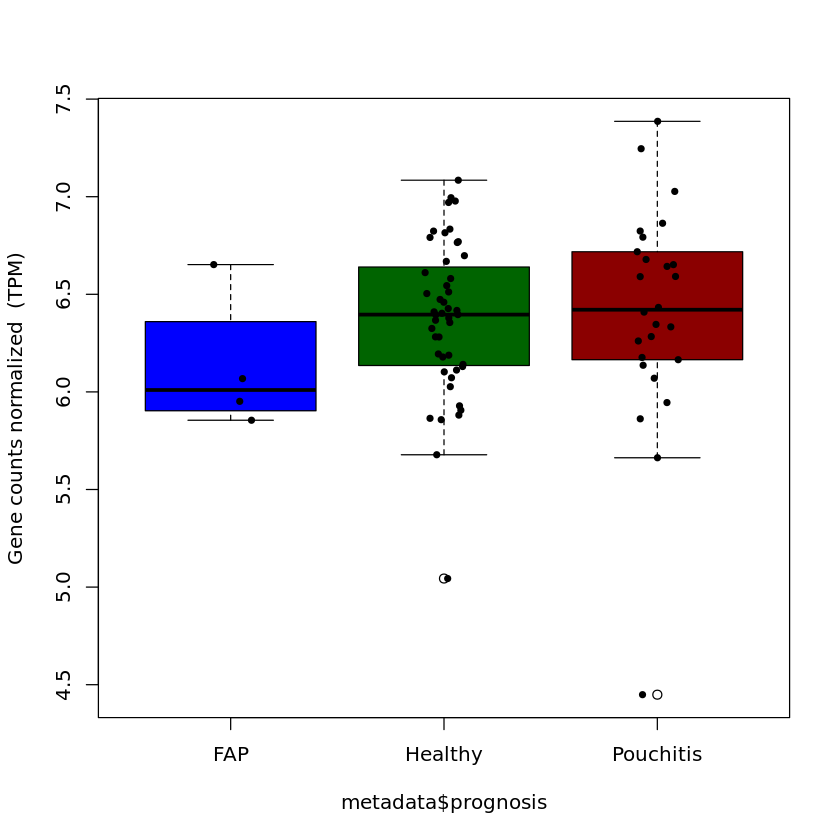

In [62]:
head (Gene_counts_Factor_vsd_df)
Gene_counts_Factor_vsd_df_t <- data.frame (t(Gene_counts_Factor_vsd_df))

#--- Check if VSD normalization is giving similar pattern to TPM?
boxplot (Gene_counts_Factor_vsd_df_t$A1BG ~ metadata$prognosis, col=Color, ylab="Gene counts normalized  (VSD)") +
stripchart(Gene_counts_Factor_vsd_df_t$A1BG ~ metadata$prognosis, vertical = TRUE, method = "jitter", add = TRUE, pch = 20, col = 'black')


In [69]:
#---- Optional Step
#--- If Needed then Merge the Count data with Metadata to Filter specific columns
Genes_vsd_meta <- merge(metadata, Gene_counts_Factor_vsd_df_t, by=0, all=F)
rownames(Genes_vsd_meta) <- Genes_vsd_meta$Row.names; Genes_vsd_meta$Row.names <- NULL

In [70]:
head (Gene_counts_Factor_vsd_df_t)
head (Genes_vsd_meta)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,BP.21201H5.1,BP.21264C1.1,BP.2168N6.1,BP.2168N6.3,BP.2171C21.2,BP.2171C21.4,BP.2171C21.5,BP.2171C21.6,BP.2189O9.2,YR211F11.2
GSM2147897,6.765230,11.37854,11.708656,4.775225,4.298512,3.182172,5.431949,3.182172,7.771411,8.548754,...,4.868023,4.674323,3.182172,3.182172,4.219209,3.789388,3.182172,4.822541,5.034460,3.182172
GSM2147875,6.408714,11.95389,13.144949,4.673245,4.673245,3.182172,5.378116,3.672594,8.231865,8.772584,...,4.445237,4.258912,3.182172,3.182172,3.182172,3.182172,3.182172,4.023722,5.298597,3.182172
GSM2147947,6.580678,11.80567,13.214186,5.066900,5.172690,3.182172,6.534761,3.550272,8.434062,8.772833,...,4.981218,4.717549,3.182172,3.182172,3.816353,3.182172,3.182172,3.182172,4.753941,3.182172
GSM2147934,6.512006,12.11976,9.710664,4.997430,4.153267,3.584838,4.723687,3.584838,8.160734,8.971358,...,4.421219,4.071346,3.182172,3.182172,3.749810,3.182172,3.584838,4.153267,4.808587,3.182172
GSM2147876,6.718004,10.91252,13.359520,5.038468,4.901941,3.182172,6.472764,3.182172,8.508200,9.107913,...,4.747812,4.432065,3.182172,3.182172,3.636151,3.182172,3.182172,3.821601,5.308759,3.182172
GSM2147901,6.355316,12.15984,12.514383,5.031907,4.742087,3.182172,5.301501,3.182172,7.671265,8.879765,...,4.351173,4.742087,3.182172,3.182172,3.634347,3.182172,3.182172,3.182172,5.433499,3.182172


ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,Sample.Title,Sex,age,diagnosis,ethnicity,patient,prognosis,tissue,A1BG,A1CF,...,BP.21201H5.1,BP.21264C1.1,BP.2168N6.1,BP.2168N6.3,BP.2171C21.2,BP.2171C21.4,BP.2171C21.5,BP.2171C21.6,BP.2189O9.2,YR211F11.2
GSM2147872,EC1,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Ileal pouch,7.027001,11.14301,...,4.963115,4.730583,3.669449,3.182172,3.182172,3.182172,3.182172,4.143481,5.733120,3.182172
GSM2147873,EC2,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Prepouch ileum,6.642839,11.22407,...,4.775142,4.422978,3.182172,3.182172,3.182172,3.663506,3.182172,4.335697,5.264731,3.182172
GSM2147874,EC3,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Ileal pouch,7.245710,10.14121,...,4.585095,5.062032,3.182172,3.182172,4.048807,3.182172,3.182172,4.390647,5.902243,3.182172
GSM2147875,EC4,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Prepouch ileum,6.408714,11.95389,...,4.445237,4.258912,3.182172,3.182172,3.182172,3.182172,3.182172,4.023722,5.298597,3.182172
GSM2147876,EC5,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Ileal pouch,6.718004,10.91252,...,4.747812,4.432065,3.182172,3.182172,3.636151,3.182172,3.182172,3.821601,5.308759,3.182172
GSM2147877,EC6,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Prepouch ileum,6.432712,11.95839,...,4.386014,4.777373,3.182172,3.182172,3.182172,3.685466,3.182172,4.045395,5.575017,3.182172


In [129]:
#---------------------------------
#-- Differentially Expressed Genes
#---------------------------------
#Gene_counts_Factor_diff <- results(Gene_counts_Factor,contrast=c("prognosis", "Pouchitis", "Healthy"),filterFun=ihw)
#--Other method
Gene_counts_Factor_diff = results(Gene_counts_Factor, contrast=c("prognosis", "Pouchitis", "Healthy"), alpha = 0.05, pAdjustMethod = "BH")
write.table(Gene_counts_Factor_diff,file = "Results_DifferentialExpression.txt",row.names = TRUE,col.names = NA,append = FALSE, quote = FALSE, sep = "\t",eol = "\n", na = "NA", dec = ".")


In [72]:
Gene_counts_Factor_diff

log2 fold change (MLE): prognosis Pouchitis vs Healthy 
Wald test p-value: prognosis Pouchitis vs Healthy 
DataFrame with 35238 rows and 6 columns
                       baseMean      log2FoldChange             lfcSE
                      <numeric>           <numeric>         <numeric>
A1BG           69.6159947679661  0.0897915803013174 0.124836134276701
A1CF           3935.61085105384  -0.176265691211367 0.135246123037043
A2M            6486.92444499121   0.519650669627689    0.223867045565
A2ML1          14.2607785370351 -0.0910702080841522 0.167662807640265
A2MP1          10.7712633049923  -0.268243053616468 0.228546595523219
...                         ...                 ...               ...
BP-2171C21.4   0.15692312296811   0.224393989077657  1.37045221702429
BP-2171C21.5  0.764948443153039  -0.314133209319346 0.603137735329295
BP-2171C21.6   5.30580596652346  -0.479909352003804 0.376134795088165
BP-2189O9.2    20.3567208897708   0.355774445828675 0.165255454840426
YR211F11.2   

In [79]:
#-- Sort based on Log2 Fold Changes
#Gene_counts_Factor_diff[with(Gene_counts_Factor_diff, order(log2FoldChange)),]
#-- Sort based on pvalue
Gene_counts_Factor_diff[with(Gene_counts_Factor_diff, order(pvalue)),]


log2 fold change (MLE): prognosis Pouchitis vs Healthy 
Wald test p-value: prognosis Pouchitis vs Healthy 
DataFrame with 35238 rows and 6 columns
                    baseMean   log2FoldChange             lfcSE
                   <numeric>        <numeric>         <numeric>
MTCO3P12    363.503275686098 7.19551410585343 0.546425163424325
MTCO1P12    1304.59986382004 4.76191467029628 0.444262277073715
IGHGP       399.035044022928 3.62303592568683 0.446322148456375
HSP90AA6P   2.70135915820809 4.59997546734562 0.632339978908974
IGLV1-41    83.3009946116276 3.44972724019031 0.480924297301098
...                      ...              ...               ...
ZNF970P                    0               NA                NA
ZNRF2P3                    0               NA                NA
ZNRF4                      0               NA                NA
ZYG11AP1                   0               NA                NA
BP-2168N6.3                0               NA                NA
                     

ERROR: Error in boxplot(Gene_counts_Factor_vsd_df_t$IGHGP ~ metadata$prognosis, : non-numeric argument to binary operator


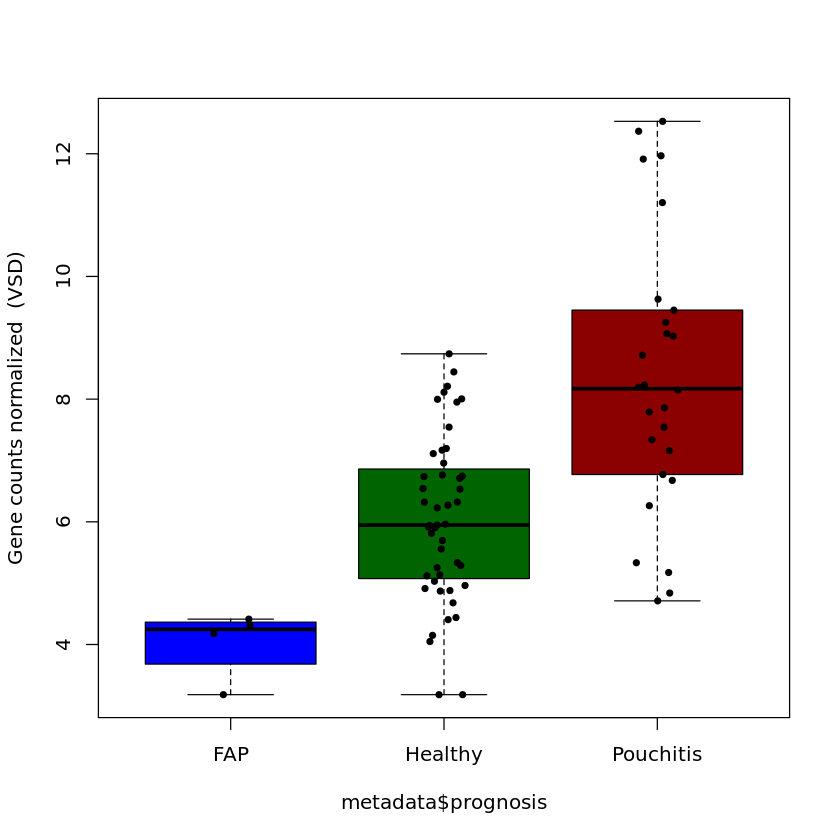

In [82]:
#-- Now Check the Expression of Gene which is Highly Expressed in Healthy RP11-1070B7.2 (Replace - with . in Gname)
boxplot (Gene_counts_Factor_vsd_df_t$IGHGP ~ metadata$prognosis, col=Color, ylab="Gene counts normalized  (VSD)") +
stripchart(Gene_counts_Factor_vsd_df_t$IGHGP ~ metadata$prognosis, vertical = TRUE, method = "jitter", add = TRUE, pch = 20, col = 'black')

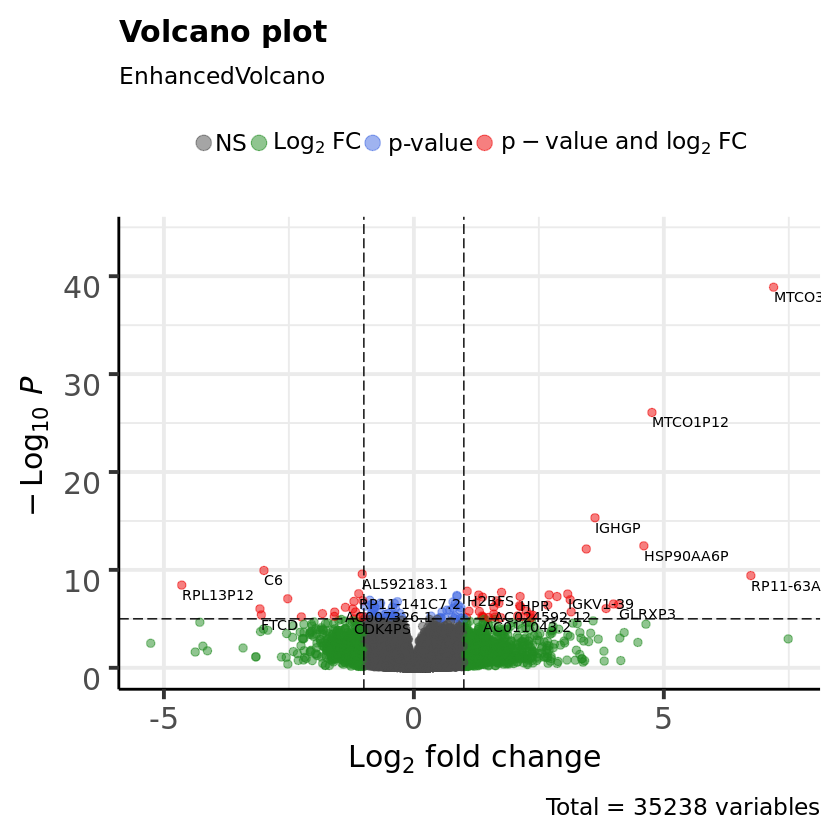

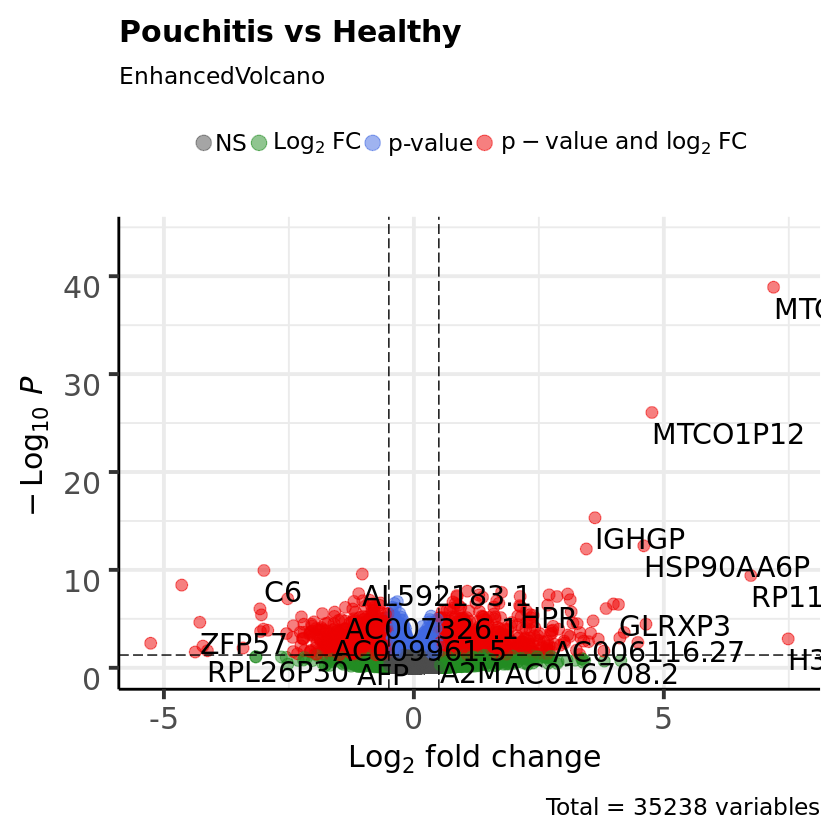

In [87]:
#--- Now this is a very Tidious and Time Consuming task to Look for Each Gene. 
# So Let's do something Quick to Get all the Genes which with high fold changes and Significance
#-- If you remember we have stored Differential Expressed Genes Result in ***Gene_counts_Factor_diff*** file 
#-- If you forget What comparisons you have made. Then look at the components of This File

#library (EnhancedVolcano)
EnhancedVolcano(Gene_counts_Factor_diff,
    lab = rownames(Gene_counts_Factor_diff),
    x = 'log2FoldChange',
    y = 'pvalue')

  EnhancedVolcano(Gene_counts_Factor_diff,
    lab = rownames(Gene_counts_Factor_diff),
    x = 'log2FoldChange',
    y = 'pvalue',
    title = 'Pouchitis vs Healthy ',
    pCutoff = 0.05,
    FCcutoff = 0.5,
    pointSize = 3.0,
    labSize = 6.0)

In [90]:
#############################################
#--Downstream analysis such as HEATMAP, PCA
############################################
#-- This analysis will be performed on VSD counts
#-- Randomly select VSD counts of 500 genes 

dim(Gene_counts_Factor_vsd_df)
rn<-nrow(Gene_counts_Factor_vsd_df)
m<-unique(sample(rn, 500))
rand_data<-Gene_counts_Factor_vsd_df[m,]
head (rand_data)
str (rand_data)

[1] 35238    77

,GSM2147897,GSM2147875,GSM2147947,GSM2147934,GSM2147876,GSM2147901,GSM2147903,GSM2147879,GSM2147888,GSM2147918,...,GSM2147939,GSM2147887,GSM2147880,GSM2147931,GSM2147928,GSM2147943,GSM2147912,GSM2147882,GSM2147948,GSM2147872
RP11-191A15.2,3.182172,3.182172,3.182172,3.182172,3.821601,3.634347,3.182172,3.182172,3.182172,3.182172,...,3.182172,3.182172,3.182172,3.182172,3.797157,3.182172,3.182172,3.182172,3.182172,3.182172
RP11-1G11.2,3.182172,3.182172,3.550272,3.182172,3.182172,3.634347,3.182172,3.182172,3.182172,3.182172,...,3.182172,3.182172,3.182172,3.182172,3.539018,3.182172,3.182172,3.182172,3.613928,3.182172
RP3-391O22.3,3.923185,3.872474,3.182172,3.182172,3.962199,3.634347,3.625481,3.182172,3.628012,3.182172,...,3.182172,3.182172,3.182172,3.505583,3.539018,3.993962,3.942225,3.182172,3.182172,3.669449
KRTAP5-14P,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,...,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172
GS1-304P7.1,3.613111,3.182172,3.182172,3.182172,3.182172,3.182172,3.182172,3.659062,3.182172,3.182172,...,3.182172,3.182172,3.182172,3.505583,3.182172,3.182172,3.182172,3.182172,3.182172,3.669449
TIMM10,7.635677,6.496856,6.718354,7.255828,6.742811,6.617974,7.680846,7.062154,7.541849,6.789730,...,7.569809,6.602535,6.956828,7.039799,6.881697,7.499524,7.934777,7.443264,6.758946,6.515253


'data.frame':	500 obs. of  77 variables:
 $ GSM2147897: num  3.18 3.18 3.92 3.18 3.61 ...
 $ GSM2147875: num  3.18 3.18 3.87 3.18 3.18 ...
 $ GSM2147947: num  3.18 3.55 3.18 3.18 3.18 ...
 $ GSM2147934: num  3.18 3.18 3.18 3.18 3.18 ...
 $ GSM2147876: num  3.82 3.18 3.96 3.18 3.18 ...
 $ GSM2147901: num  3.63 3.63 3.63 3.18 3.18 ...
 $ GSM2147903: num  3.18 3.18 3.63 3.18 3.18 ...
 $ GSM2147879: num  3.18 3.18 3.18 3.18 3.66 ...
 $ GSM2147888: num  3.18 3.18 3.63 3.18 3.18 ...
 $ GSM2147918: num  3.18 3.18 3.18 3.18 3.18 ...
 $ GSM2147927: num  3.18 3.18 3.63 3.18 3.63 ...
 $ GSM2147917: num  3.18 3.18 3.18 3.18 3.18 ...
 $ GSM2147944: num  3.18 3.18 3.18 3.18 3.18 ...
 $ GSM2147886: num  3.18 3.18 3.18 3.18 3.66 ...
 $ GSM2147940: num  3.18 3.18 3.57 3.18 3.18 ...
 $ GSM2147885: num  3.63 3.18 3.63 3.18 3.18 ...
 $ GSM2147941: num  3.18 3.18 3.62 3.18 3.18 ...
 $ GSM2147915: num  3.18 3.18 3.85 3.18 3.18 ...
 $ GSM2147893: num  3.18 3.18 3.66 3.18 3.18 ...
 $ GSM2147930: num  3.18 3.1

In [95]:
#-- Get epithelial cell proportions From The deconvolution file and Add this in the Metadata
cell_proportions <- read.csv(file = "Predicted_cell_type_Composition.tsv", sep = "\t", header = T, row.names = 1)
epithelial_cell <- cell_proportions$Epithelial_cell
epithelial_cell <- data.frame(epithelial_cell)
#--- Prepare a New Metadata to Add Epithelial Cells
metadata_new <- cbind(metadata, epithelial_cell)
rownames(metadata_new)<- rownames(metadata_new)
head (metadata_new)

,Sample.Title,Sex,age,diagnosis,ethnicity,patient,prognosis,tissue,epithelial_cell
GSM2147897,NH1,male,30,Ulcerative colitis,Caucasian,P427,Healthy,Prepouch ileum,0.65147
GSM2147875,EC4,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Prepouch ileum,0.65050
GSM2147947,NH64,missing,missing,Normal,Caucasian,IL1,Healthy,Ile,0.67029
GSM2147934,NH60,male,missing,Ulcerative colitis,Caucasian,P607,Healthy,Prepouch ileum,0.73082
GSM2147876,EC5,male,28,Ulcerative colitis,Caucasian,P500,Pouchitis,Ileal pouch,0.67588
GSM2147901,NH23,male,47,Ulcerative colitis,South Indian,P505,Healthy,Ileal pouch,0.73021


In [98]:
#--- Before generating HeatMap again check the row.names in new metadata and columnnames in rand_data are in the same order
row.names (metadata_new)
colnames (rand_data)

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

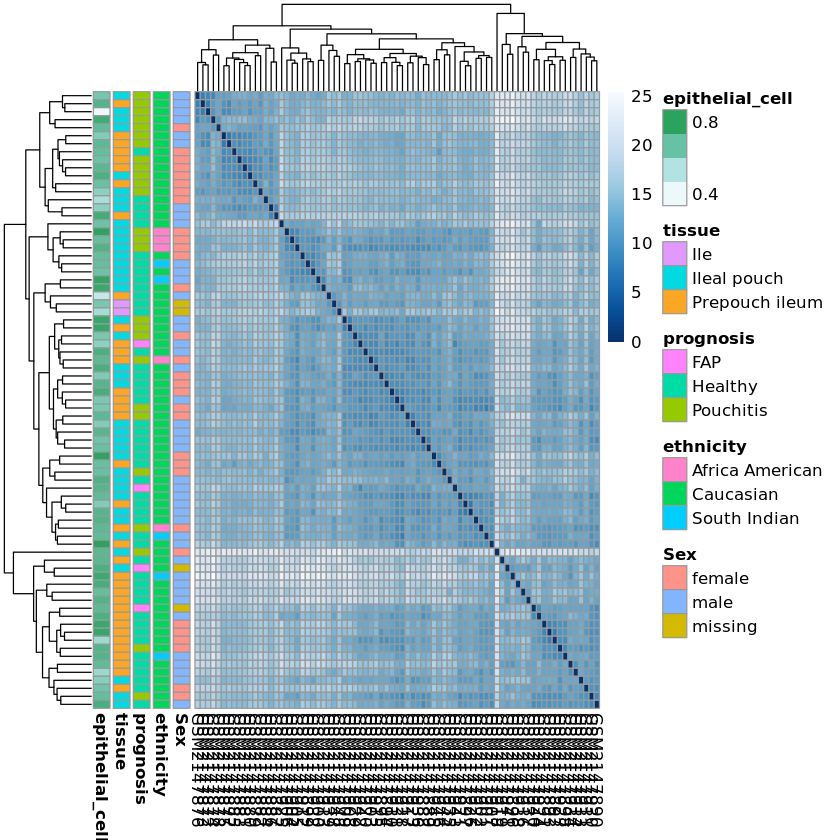

In [97]:
#################################
#---- Generate SampleWise HeatMap
##################################
library(RColorBrewer)
library("pheatmap")
metadata_filtered <- metadata_new[,c(2,5,7:9)]

#--- Sample data using only random 500 genes
sampleDists <- dist(t(rand_data))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- rownames(metadata_filtered)
colnames(sampleDistMatrix) <- rownames(metadata_filtered)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

thisheat <- pheatmap(sampleDistMatrix,
                     clustering_distance_rows=sampleDists,
                     clustering_distance_cols=sampleDists,
                     col=colors, annotation_row= metadata_filtered, show_rownames =FALSE,show_colnames = TRUE,legend = TRUE,legend.cex = .05)


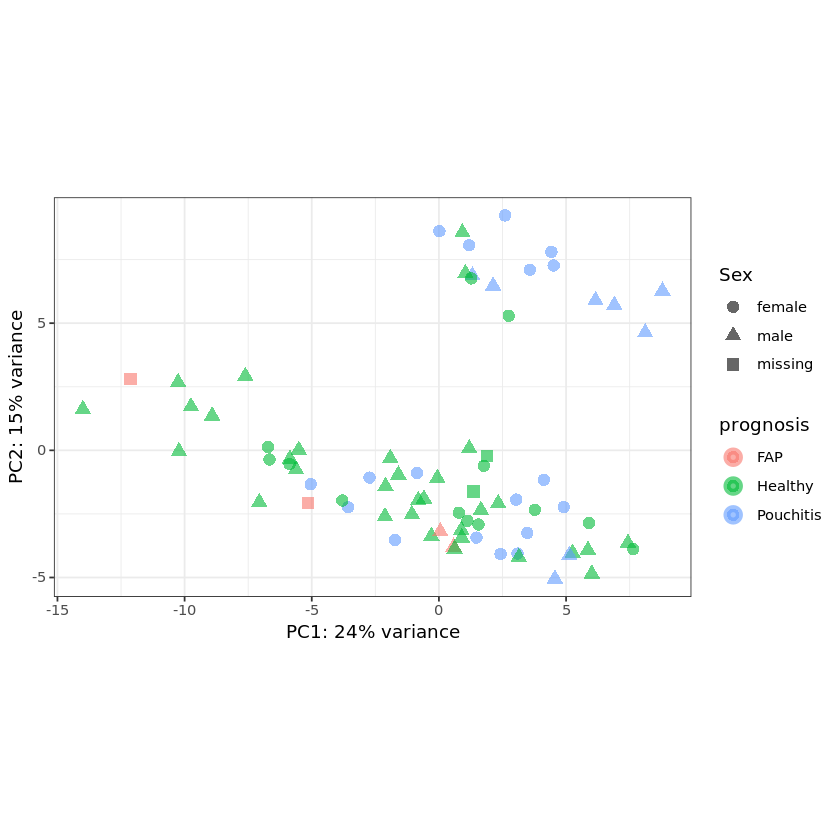

In [112]:
###################
#---- PCA Analysis
###################
pcarip <- prcomp(t(rand_data))

#percent variance for each component
percentVar <- round(100*pcarip$sdev^2/sum(pcarip$sdev^2))

#retrieve the samples coordinates, and the loadings for each gene in each component
aloadrip <- abs(pcarip$rotation)
ripaloadrelative <- sweep(aloadrip, 2, colSums(aloadrip), "/")
#create data frame for plotting
pcaALL <- pcarip$x
pcaR<- data.frame(pcaALL[,1:2],metadata_filtered)

#plot with sample labels
library(ggrepel)
#jpeg("Outputs/pca.jpg", height = 7, width = 7, units = 'in', res = 600)
ggplot(pcaR, aes(PC1, PC2, color= prognosis, shape=Sex)) + geom_point(alpha=0.6,stroke = 3)+
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  coord_fixed()  +theme_bw()
#dev.off ()

In [123]:
#----- If By anyMethod - like PCA, Variance partition, differential Expression You have found few Genes which are Significantly Discriminating
#---- Can you pick Those Genes and Make a HeatMap of Those selected Genes""
Sel_genes <- c('UGT2B17', 'GSTM1', 'XRRA1', 'AKR1B15', 'DDTL', 'GBP3', 'DSG3', 'CYP4F11', 'DMRTA1', 'ERAP2', 'MYADML2', 'GRSF1', 'HOXA13', 'BTN3A2', 'UGT3A1', 'GSTM3', 'ARL17B', "IL26", "HLA.G")
# In this file VSD nomralized Counts were there head (Gene_counts_Factor_vsd_df_t)
Sel_genes_vsd <- Gene_counts_Factor_vsd_df_t[Sel_genes]
str (Sel_genes_vsd)

'data.frame':	77 obs. of  19 variables:
 $ UGT2B17: num  14.5 14.1 13.6 13.7 13.4 ...
 $ GSTM1  : num  3.79 5.49 4.37 4.63 5.44 ...
 $ XRRA1  : num  7.38 8.56 7.58 8.38 8.76 ...
 $ AKR1B15: num  8.43 6.82 7.91 8.01 6.99 ...
 $ DDTL   : num  6.97 7.18 5.77 7.51 6.33 ...
 $ GBP3   : num  12.73 11.87 12.18 8.77 11.06 ...
 $ DSG3   : num  7.71 6.41 7.2 8.74 7.36 ...
 $ CYP4F11: num  9.9 4.53 9.52 10.18 4.8 ...
 $ DMRTA1 : num  7.03 4.26 7.05 4.23 4.18 ...
 $ ERAP2  : num  10.9 11.3 10.9 11.4 11.3 ...
 $ MYADML2: num  4.67 4.74 4.2 3.18 4.08 ...
 $ GRSF1  : num  10.4 10.4 10.5 10.6 10.4 ...
 $ HOXA13 : num  3.18 3.18 4.2 4.36 3.18 ...
 $ BTN3A2 : num  10.6 10.6 10.5 10.1 10.5 ...
 $ UGT3A1 : num  5.25 4.67 7.17 7.94 3.96 ...
 $ GSTM3  : num  9.61 9.09 8.9 7.3 8.19 ...
 $ ARL17B : num  7.29 7.14 7.15 6.85 7.42 ...
 $ IL26   : num  4.37 4.53 3.91 4.15 4.5 ...
 $ HLA.G  : num  3.92 4.6 4.32 4.3 4.99 ...


In [125]:
#- Again check the row.names in metadata_final and this file
row.names (metadata_filtered)
row.names (Sel_genes_vsd)

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

[1] "GSM2147897" "GSM2147875" "GSM2147947" "GSM2147934" "GSM2147876"
 [6] "GSM2147901" "GSM2147903" "GSM2147879" "GSM2147888" "GSM2147918"
[11] "GSM2147927" "GSM2147917" "GSM2147944" "GSM2147886" "GSM2147940"
[16] "GSM2147885" "GSM2147941" "GSM2147915" "GSM2147893" "GSM2147930"
[21] "GSM2147899" "GSM2147919" "GSM2147889" "GSM2147873" "GSM2147920"
[26] "GSM2147922" "GSM2147925" "GSM2147932" "GSM2147914" "GSM2147904"
[31] "GSM2147891" "GSM2147916" "GSM2147929" "GSM2147937" "GSM2147881"
[36] "GSM2147938" "GSM2147892" "GSM2147898" "GSM2147883" "GSM2147945"
[41] "GSM2147942" "GSM2147884" "GSM2147902" "GSM2147923" "GSM2147906"
[46] "GSM2147911" "GSM2147900" "GSM2147921" "GSM2147895" "GSM2147910"
[51] "GSM2147905" "GSM2147913" "GSM2147936" "GSM2147874" "GSM2147909"
[56] "GSM2147924" "GSM2147946" "GSM2147933" "GSM2147890" "GSM2147877"
[61] "GSM2147894" "GSM2147907" "GSM2147896" "GSM2147878" "GSM2147908"
[66] "GSM2147935" "GSM2147926" "GSM2147939" "GSM2147887" "GSM2147880"
[71] "GSM2147931" "GSM2147928" "GSM2147943" "GSM2147912" "GSM2147882"
[76] "GSM2147948" "GSM2147872"

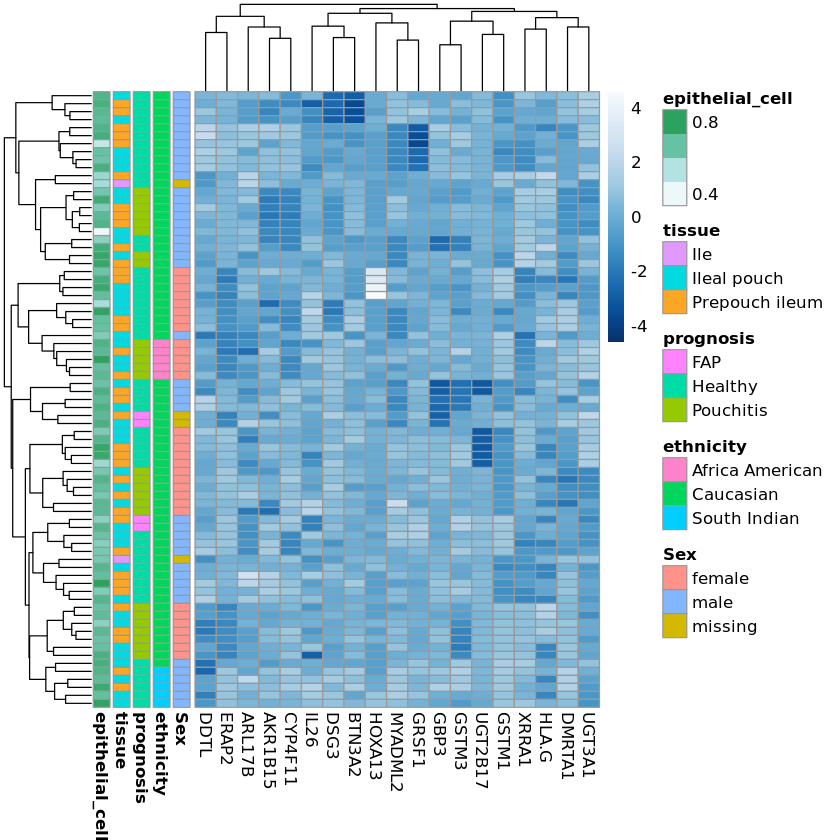

In [127]:
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

#jpeg("Figures/SelectedGenes_ResidualsModelA_HeatMap.jpg", height =11, width = 11, units = 'in', res = 600)
check <- pheatmap(Sel_genes_vsd, scale = "column",
                  col=colors, annotation_row= metadata_filtered, show_rownames =FALSE,show_colnames = TRUE,legend = TRUE,legend.cex = .05)
#dev.off ()

In [ ]:
#---- Now you need to Select the Genes based on pvlues, fold changes of variance partitions.
#-- There are Many more things which can be done.
#-- Sel around 600 Genes from Results_DifferentialExpression.txt file
# Important genes can be used to do pathway analysis - metascape
#https://metascape.org/gp/index.html#/main/step1